Import necessary Libraries


In [0]:
# Importing Numpy
import numpy as np

# Importing Pandas
import pandas as pd

# Importing Matplotlib
import matplotlib.pyplot as plt

# Importing Seaborn
import seaborn as sns

%matplotlib inline

Variable definitions

In [15]:
#Variable definitions 
definitions_df = pd.read_csv('http://bit.ly/VariableDefinitions')
definitions_df.head(20)


,Variable Definitions,Unnamed: 1
0,country,Country interviewee is in.
1,year,Year survey was done in.
2,uniqueid,Unique identifier for each interviewee
3,location_type,"Type of location: Rural, Urban"
4,cellphone_access,"If interviewee has access to a cellphone: Yes, No"
5,household_size,Number of people living in one house
6,age_of_respondent,The age of the interviewee
7,gender_of_respondent,"Gender of interviewee: Male, Female"
8,relationship_with_head,The interviewee’s relationship with the head o...
9,marital_status,The martial status of the interviewee: Married...


Preview the dataset


In [16]:
#Dataset head preview
finaccess_df = pd.read_csv('http://bit.ly/FinancialDataset')
finaccess_df.head(10)

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed
5,Kenya,2018,uniqueid_6,No,Rural,No,7.0,26.0,Female,Spouse,Married/Living together,Primary education,Informally employed
6,Kenya,2018,uniqueid_7,No,Rural,Yes,7.0,32.0,Female,Spouse,Married/Living together,Primary education,Self employed
7,Kenya,2018,uniqueid_8,No,Rural,Yes,1.0,42.0,Female,Head of Household,Married/Living together,Tertiary education,Formally employed Government
8,Kenya,2018,uniqueid_9,Yes,Rural,Yes,3.0,54.0,Male,Head of Household,Married/Living together,Secondary education,Farming and Fishing
9,Kenya,2018,uniqueid_10,No,Urban,Yes,3.0,76.0,Female,Head of Household,Divorced/Seperated,No formal education,Remittance Dependent


In [17]:
#Dataset tail preview
finaccess_df.tail(10)

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
23514,Uganda,2018,uniqueid_2107,No,Urban,Yes,NaN,24.0,Female,Spouse,Married/Living together,Primary education,Self employed
23515,Uganda,2018,uniqueid_2108,No,Rural,No,NaN,16.0,Male,Parent,Single/Never Married,Primary education,Other Income
23516,Uganda,2018,uniqueid_2109,No,Urban,Yes,NaN,35.0,Male,Head of Household,Married/Living together,Primary education,Self employed
23517,Uganda,2018,uniqueid_2110,No,Urban,Yes,NaN,16.0,Male,Parent,Single/Never Married,Primary education,Other Income
23518,Uganda,2018,uniqueid_2111,No,Rural,Yes,NaN,20.0,Female,Child,Single/Never Married,Primary education,No Income
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed
23523,Uganda,2018,uniqueid_2117,No,Rural,Yes,10.0,20.0,Male,Child,Single/Never Married,Secondary education,No Income


#Understanding the data given for analysis (Univariate analysis for each dimension)


Install Pandas Profiling, to give us a detailed breakdown of the *dataset*

In [18]:
import pandas_profiling as pp
pp.ProfileReport(finaccess_df)

/usr/local/lib/python3.6/dist-packages/pandas_profiling/describe.py:392: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  variable_stats = pd.concat(ldesc, join_axes=pd.Index([names]), axis=1)


Number of variables,13
Number of observations,23524
Total Missing (%),0.1%
Total size in memory,2.3 MiB
Average record size in memory,104.0 B
Numeric,3
Categorical,10
Boolean,0
Date,0
Text (Unique),0
Rejected,0


From this breakdown, some interesting observations can already be made. For example we can see that our sample skews largely female (59% female vs 41% male).Further analysis will be done to see if the gender disparity is maintained, lessened, or increased across different categories like head of household, cellphone ownership and education level.

There is a much higher percentage of rural-dwelling respondents from our sample than those that are urban-dwelling (61% vs 39%). Considering the fact that the greater East Africa region is mostly agrarian, this comes as no surprise. However, combining this with data on cell phone access (74% with access vs 26% without access), we see a large opening for disruption if financial institutions can focus on these areas. In census data, access to cellphones act as a good indicator for financial ability, since the researchers can't collect financial data directly from respondents.


------------------


**Null data and anomalies**

We have a very low incidence rate for null data (0.1%), so we can delete it without fear of it affecting our analysis negatively.

The Unique_ID field has also been flagged for having too high a **cardinality**. This is not alarming, since each respondent has their own unique ID. We can ignore this warning, especially because the Unique ID is not important for our analysis.



In [30]:
finaccess_df.dropna()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed


-----------------------


Below are measures of dispersion for the 2 numerical variables in our dataset. The colored aeas represent the Inter Quartile Range. The data points that fall outside of the limits of the whiskers represent outliers. 


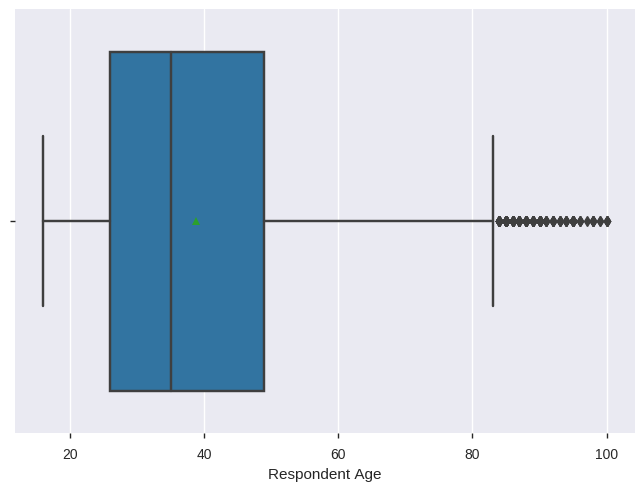

In [24]:
#Age distribution 
sns.boxplot(x = finaccess_df['Respondent Age'], showmeans=True)

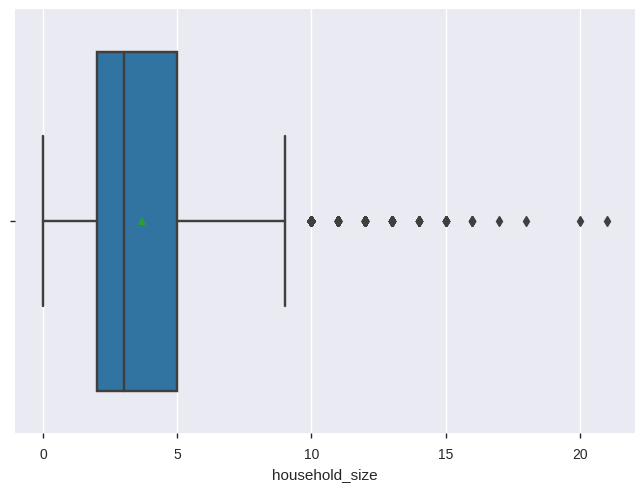

In [23]:
#Household size distribution
sns.boxplot(x = finaccess_df['household_size'], showmeans=True)

# Bivariate analysis

We can start by checking the strength of the correlation between all the numerical data. We have two variables that we can compare in this way: Household size and respondent age.  

In [19]:
finaccess_df.corr()

,year,household_size,Respondent Age
year,1.000000,-0.049344,-0.019570
household_size,-0.049344,1.000000,-0.119709
Respondent Age,-0.019570,-0.119709,1.000000


From the correlation table above, we can see there is a weak, almost non-existent relationship between the age of the respondent and household size. The exact correlation coefficient is -0.119709.

------------------------------

Taking into account the fact that cellphone ownership / access is both an indicator for financial ability and a representation for a future mobile banking customer, we can use this variable to further break down the gender split (59% male vs 41% female).

[Text(0, 0.5, 'Number of Respondents'),
 Text(0.5, 1.0, 'Cell Phone Access by Gender')]

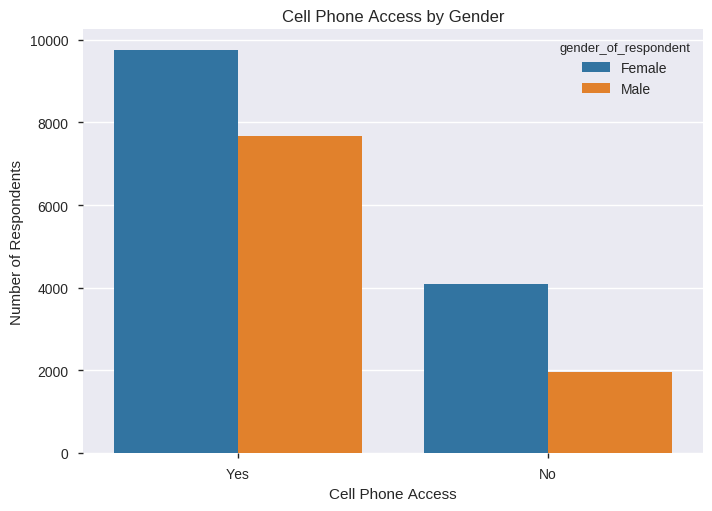

In [39]:
#Male vs female access to cellphones

#sns.countplot('gender_of_respondent', hue='Cell Phone Access', data=finaccess_df)
ax = sns.countplot('Cell Phone Access', hue='gender_of_respondent', data=finaccess_df)
ax.set(ylabel = 'Number of Respondents',
       title = 'Cell Phone Access by Gender')

[Text(0, 0.5, 'Number of Respondents'),
 Text(0.5, 1.0, 'Education levels by Gender')]

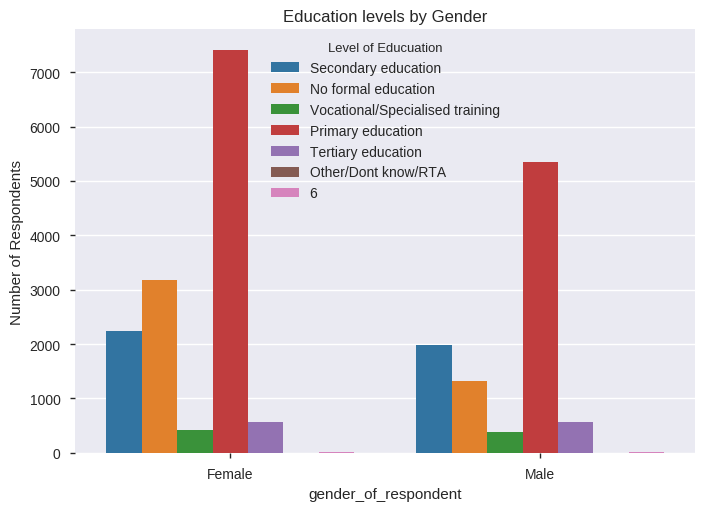

In [44]:
#Male vs female level of education

ax = sns.countplot('gender_of_respondent', hue='Level of Educuation', data=finaccess_df)
ax.set(ylabel = 'Number of Respondents',
       title = 'Education levels by Gender')

The above 2 charts clearly support our initial observation, that females, and their potential as account holders, significantly outnumber the males. Assuming that there were no biases during data collection by the researchers, I can strongly recommend very female-specific marketing and advertising with the intention of acquiring customers. 

Advertising tends to be ignorant of true demographics existing on the ground, especially with projects like these where the service provider tends to just see the potential customers in rural areas, and runs to market to that area, without breaking down the demographic further. That is why I would provide this overwhelming evidence to support female-targeted advertising.


---------------------

One last comparison we can do is to see the distribution of respondents with cellphone access across different employment types. This visualization will also aid in targeted advertising. 

[Text(0, 0.5, 'Number of Respondents'),
 Text(0.5, 1.0, 'Cellphone access across different employment types')]

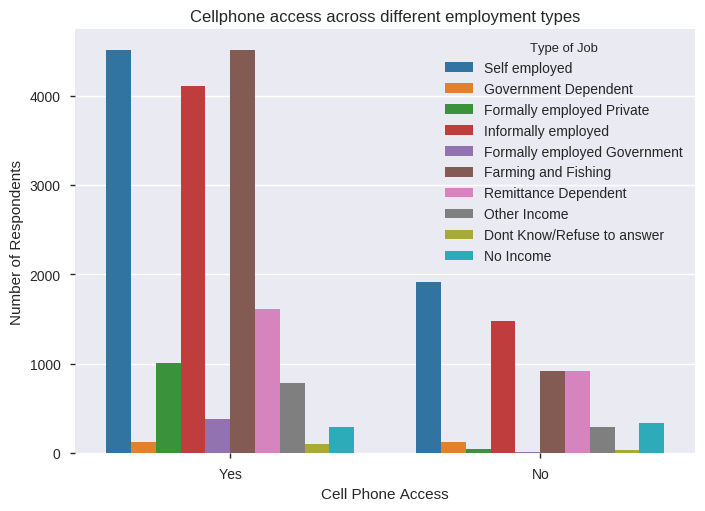

In [45]:
#Cellphone access across different employment types

ax = sns.countplot('Cell Phone Access', hue='Type of Job', data=finaccess_df)
ax.set(ylabel = 'Number of Respondents',
       title = 'Cellphone access across different employment types')

There is something unusual about the charts above. The informally employed respondents with cellphone access greatly outnumber those that are formally employed by more than 3x.  

Going by what we know of real-world data, we know that this is not a representation of the entire population. **Those with formal employment have higher purhasing power and thus are more likely to have access to cellphones.**

This anomaly can easily be explained by the sampling methodology e.g. if you collect most of your data in rural areas, most respondents are more likely to have informal employment.

The anomaly can be rectified by: 


1.   using averages instead of sums
2.   ensuring better balancing of demographics during sampling 


